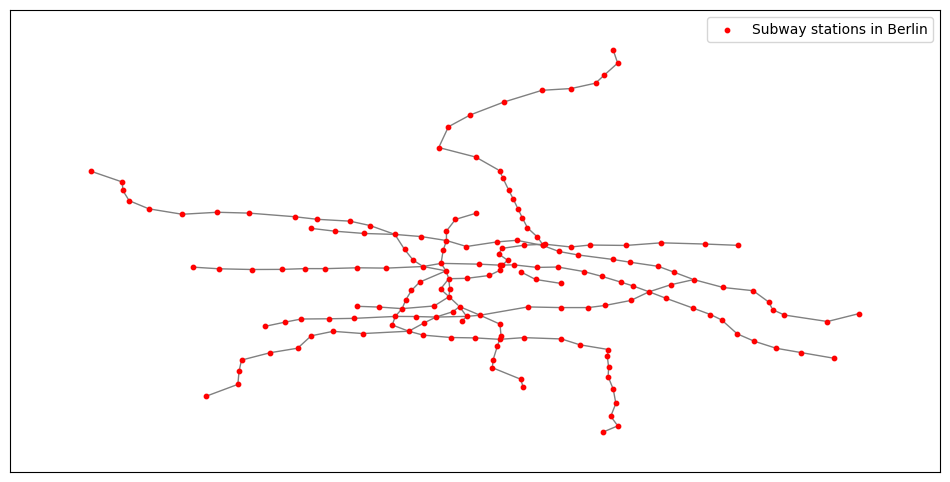

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from ipynb.fs.full.visuals import (read_in_network,
                                   convert_to_graph,
                                   add_positions,
                                   visualize,
                                   draw_nodes_on_map)

In [2]:
berlin, berlin_nodes = read_in_network('berlin')

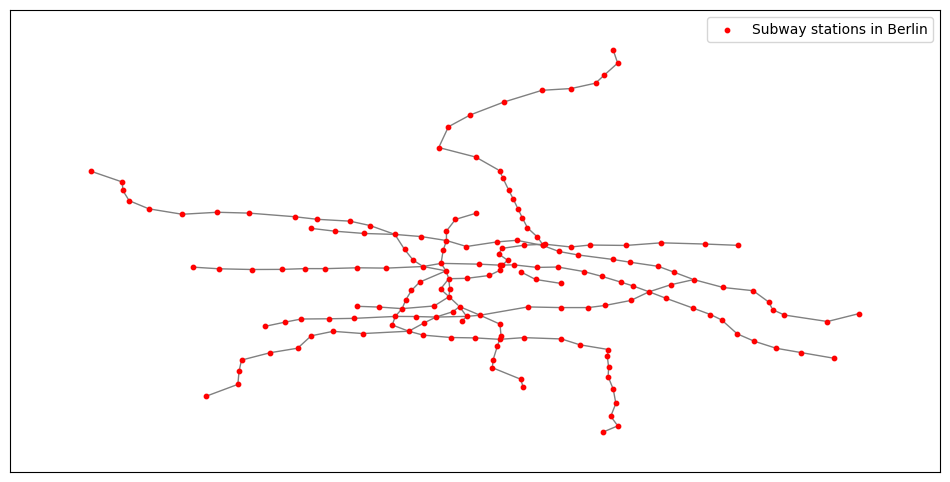

In [3]:
G = convert_to_graph(berlin)
pos = add_positions(G, berlin_nodes)
visualize("Berlin", G, pos)

## Connectivity

In [4]:
nx.is_connected(G) # For undirected graph

False

In [5]:
nx.number_connected_components(G)

3

In [6]:
sorted(nx.connected_components(G))

[{1894,
  1955,
  2024,
  2029,
  2030,
  2031,
  2045,
  2392,
  2444,
  2453,
  2468,
  2562,
  2563,
  2609,
  2611,
  2612,
  2613,
  2614,
  2617,
  2622},
 {111,
  120,
  132,
  135,
  172,
  178,
  188,
  189,
  195,
  210,
  217,
  218,
  219,
  220,
  228,
  229,
  230,
  240,
  241,
  256,
  257,
  270,
  271,
  272,
  279,
  280,
  297,
  304,
  305,
  314,
  315,
  316,
  317,
  326,
  327,
  345,
  356,
  370,
  379,
  380,
  384,
  389,
  390,
  391,
  395,
  396,
  411,
  412,
  426,
  441,
  449,
  450,
  539,
  540,
  597,
  600,
  601,
  614,
  625,
  720,
  721,
  725,
  729,
  730,
  734,
  741,
  742,
  747,
  748,
  836,
  850,
  863,
  864,
  879,
  880,
  881,
  957,
  958,
  959,
  961,
  969,
  970,
  977,
  978,
  979,
  984,
  1026,
  1027,
  1037,
  1043,
  1197,
  1210,
  1211,
  1220,
  1250,
  1251,
  1270,
  1425,
  1426,
  1427,
  1445,
  1450,
  1451,
  1457,
  1470,
  1471,
  1479,
  1480,
  1520,
  1521,
  1544,
  1545,
  1554,
  1611,
  1623,
  162

## Robustness
The ability of a network to maintain its general structural properties (like connectivity) when it faces disruptions or attacks (loses nodes or edges).

In [7]:
# Minimum number of nodes that need to be removed to disconnect the graph
nx.node_connectivity(G)

# Which node to remove to disconnect the graph
# nx.minimum_node_cut(G)

0

In [8]:
# Minimum number of edges that need to be removed to disconnect the graph
nx.edge_connectivity(G)

# Which edge to remove to disconnect the graph
# nx.minimum_edge_cut(G)

0

Robust networks have large minimum node and edge connectivity.

## Paths from one node to another

In [9]:
# All path options from source to sink
sorted(nx.all_simple_paths(G, 111, 132))

[[111, 120, 135, 132],
 [111,
  217,
  218,
  220,
  210,
  1920,
  1886,
  1896,
  1878,
  1903,
  1888,
  256,
  257,
  272,
  271,
  304,
  1425,
  305,
  297,
  314,
  317,
  316,
  172,
  978,
  969,
  970,
  741,
  721,
  720,
  725,
  396,
  412,
  411,
  379,
  384,
  389,
  132],
 [111,
  217,
  218,
  220,
  210,
  1920,
  1886,
  1896,
  1878,
  1903,
  1888,
  256,
  257,
  272,
  271,
  304,
  1425,
  305,
  297,
  314,
  317,
  316,
  172,
  978,
  969,
  970,
  741,
  721,
  720,
  730,
  729,
  390,
  977,
  389,
  132],
 [111,
  217,
  218,
  220,
  210,
  1920,
  1886,
  1896,
  1878,
  1903,
  1888,
  256,
  257,
  272,
  271,
  304,
  1425,
  305,
  297,
  314,
  317,
  316,
  172,
  978,
  969,
  970,
  741,
  721,
  720,
  730,
  729,
  390,
  977,
  391,
  389,
  132],
 [111,
  217,
  218,
  220,
  210,
  1920,
  1886,
  1896,
  1878,
  1903,
  1888,
  256,
  257,
  272,
  271,
  304,
  1425,
  305,
  297,
  314,
  317,
  316,
  172,
  978,
  969,
  970,
  741,
 

In [10]:
# Number of nodes to remove to disrupt path from source to sink
print(nx.node_connectivity(G, 111, 132))

# Which nodes?
print(nx.minimum_node_cut(G, 111, 132))

2
{389, 135}


In [11]:
# Removing one of the nodes
G.remove_node(389)

In [12]:
sorted(nx.all_simple_paths(G, 111, 132))

[[111, 120, 135, 132]]

In [13]:
# Number of edges to remove to disrupt path from source to sink
print(nx.edge_connectivity(G, 111, 132))

# Which edges?
print(nx.minimum_edge_cut(G, 111, 132))

1
{(135, 132)}


## Local Clustering Coefficient
Fraction of pairs of a node’s connections that are connected with each other.
The LCC of a node of degree less than 2 is 0.

In [14]:
# LCC of node 2562
nx.clustering(G, 111)

0

## Global clustering coefficient

### Approach 1: 
Average the local clustering coefficient over all nodes in a graph

In [15]:
nx.average_clustering(G)

0.0028735632183908046

### Approach 2: 
Percentage of ‘open triads’ that are triangles in a network.

Transitivity = (3*number of triangles)/number of open triads

In [16]:
nx.transitivity(G)

0.01327433628318584

## Diatance between two nodes

The length of the shortest path between them.

In [17]:
# Shortest path between 111 and 2087
nx.shortest_path(G, 111, 2087)

[111,
 217,
 218,
 220,
 210,
 1920,
 1886,
 1896,
 1878,
 1903,
 1888,
 256,
 257,
 317,
 316,
 178,
 1964,
 1887,
 1953,
 1889,
 1890,
 1891,
 1892,
 1954,
 1893,
 1973,
 1974,
 1969,
 2087]

In [18]:
# Length of the shortest path between 111 and 2087
nx.shortest_path_length(G, 111, 2087)

28

## Distance from a node to all the other nodes
### 1. Breadth First Search: 
An algorithm for searching a tree data structure for a node that satisfies a given property. It starts at the tree root and explores all nodes at the present depth prior to moving on to the nodes at the next depth level.

{2562: 0, 2563: 1, 2453: 1, 2609: 2, 2468: 2, 2611: 3, 2444: 3, 2392: 4, 2612: 4, 2024: 5, 2613: 5, 2614: 6, 2031: 6, 2030: 7, 2622: 7, 2617: 8, 2045: 8, 2029: 9, 1894: 10, 1955: 11}


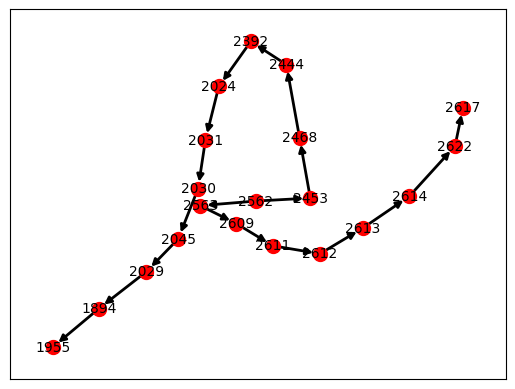

In [19]:
# Returns the tree graph of nodes discovered in BFS
T = nx.bfs_tree(G, 2562)
print(nx.shortest_path_length(T, 2562))
nx.draw_networkx(T, with_labels=True, node_size=100, node_color='red', width=2, font_size=10)

## Distance Measures

### 1. Average distance
between all pairs of nodes in the graph

In [20]:
nx.average_shortest_path_length(T) # Note: graph must be connected

1.068421052631579

### 2. Diameter
Maximum distance between any pair of nodes

In [21]:
# x.diameter(G) # Note: Graph must be strongly connected

### 3. Eccentricity of a node
Largest distance between a node and all the pther nodes

In [22]:
# nx.eccentricity(G) # Note: Graph must be strongly connected

### 4. Radius
It is the minimum eccentricity

In [23]:
# nx.radius(G) # Note: Graph must be strongly connected

### 5. Periphery
The set of nodes that have eccentricity equal to diameter (nodes that are on the outskirts of a graph)

In [24]:
# nx.periphery(G) # Note: Graph must be strongly connected

### 6. Center
The set of nodes have eccentricity equal to the radius (nodes that are in the center of the graph)

In [25]:
# nx.center(G) # Note: Graph must be strongly connected

In [26]:
stats = pd.read_csv('network_data/berlin/stats.csv', sep=';')
stats = stats.transpose()
stats

0
buffer_center_lat     52.519004
buffer_center_lon     13.402914
buffer_radius_km           30.0
extract_start_date   2016-04-25
link_distance_avg_m         743
n_connections           1048218
n_links                   12079
n_stops                    4601
network_length_m        8986014
vehicle_kilometers   588371.215

In [28]:
draw_nodes_on_map(berlin_nodes)